# Marketing Analysis Project
The data for this project was downloaded from Kaggle:

(https://www.kaggle.com/jackdaoud/marketing-data)

PART 1: Loading Data

In [1]:
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
marketing_data = pd.read_csv("marketing_data.csv")
pd.set_option("display.max_columns", None)
marketing_data.head()

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       189        104              379              111   
1    6/15/14        0       464          5               64                7   
2    5/13/14        0       134         11               59               15   
3    5/11/14        0        10          0                1                0   
4     4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
0               189              218                  1                4   
1                 0               37                  1                7   
2                 2               30                  1                3   
3                 0                0                  1                1   
4                 0               34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  
0      SP  
1      CA  
2      US  
3     AUS  
4      SP

In [3]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
# check to see any missing data
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

Summary for Part 1:
After loading data, there are some data information:
- There are 28 columns and 2220 rows
- The income column has missing data and not intergers

PART 2: DATA CLEANING

In [7]:
# taking dollar sign out of values and convert to float
marketing_data["Income"] = marketing_data["Income"].replace("[\$,]", "", regex=True).astype(float)

#summary stats
print(marketing_data["Income"].describe())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [8]:
#make all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]
print(marketing_data.columns)

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')


<IPython.core.display.Javascript object>


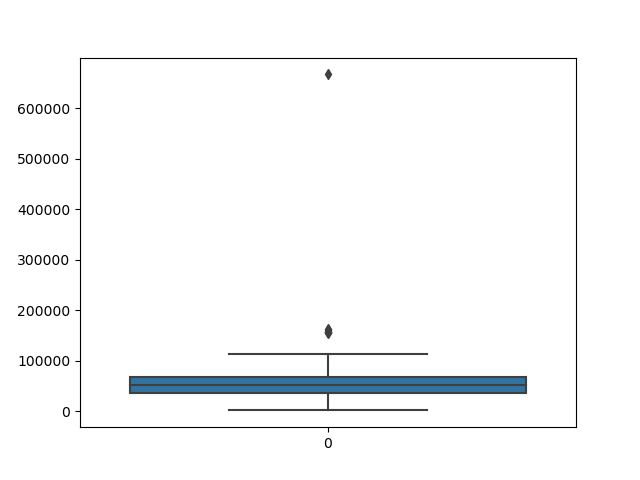

In [9]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

<IPython.core.display.Javascript object>


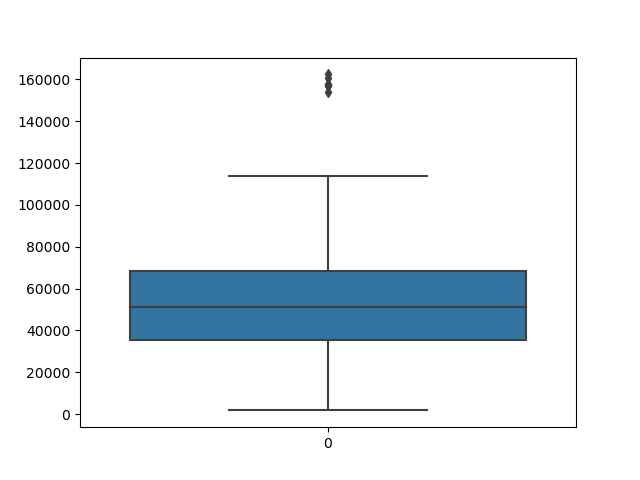

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [10]:
# remove incomes below 300000
marketing_data = marketing_data[marketing_data["income"] < 300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

marketing_data["income"].describe()


In [11]:
#replace missing values with the mean income
marketing_data["income"] = marketing_data["income"].fillna(marketing_data["income"].mean())

<IPython.core.display.Javascript object>


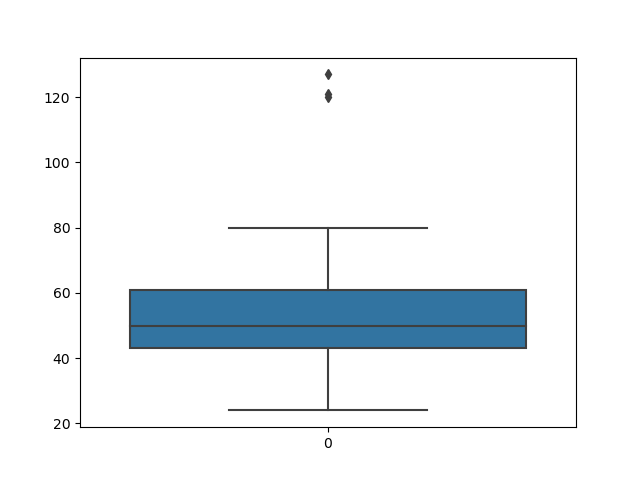

count    2215.000000
mean       51.183296
std        11.987000
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: age, dtype: float64

In [12]:
# add an age column for easy to analysis, 2020 is from a year that dataset is made
marketing_data["age"] = 2020 - marketing_data["year_birth"]
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

<IPython.core.display.Javascript object>


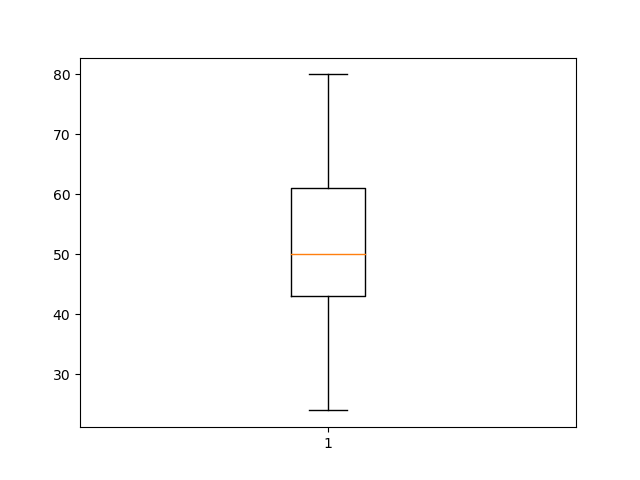

count    2212.000000
mean       51.086347
std        11.701599
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64

In [13]:
marketing_data = marketing_data[marketing_data["age"] < 100]

plt.figure()
plt.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

<IPython.core.display.Javascript object>


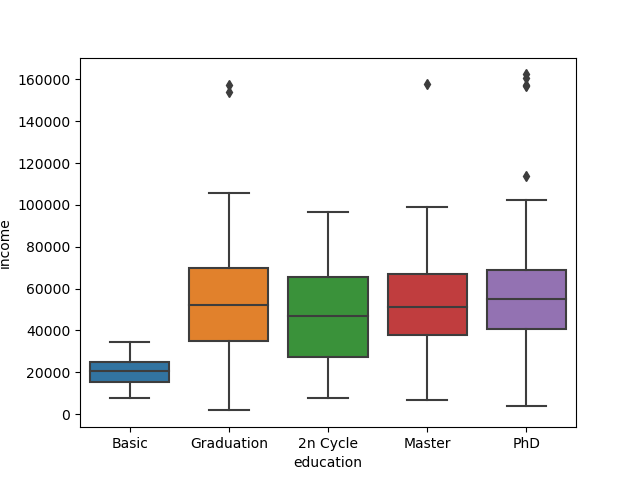

In [14]:
# check education variable
plt.figure()
sns.boxplot(x=marketing_data["education"], y=marketing_data["income"], 
            order=["Basic","Graduation","2n Cycle","Master","PhD"])
plt.show()


Summary for part2:
- By using box plot, there is one large outliner in income column. Income is one of the main varibles that will be explored in analysis so it needs to be tidy and ready to exploration( removed that outliner, replace mean to null values)
- Age column also has the outliner (removed that outliner so age distributiion is symmetric and ready for analysis)
- Education is another column that need to be focused on this analysis, there is no need to change on this column based on boxplot graph.

PART 3: EXPLORATORY DATA ANALYSIS(EDA)

<IPython.core.display.Javascript object>


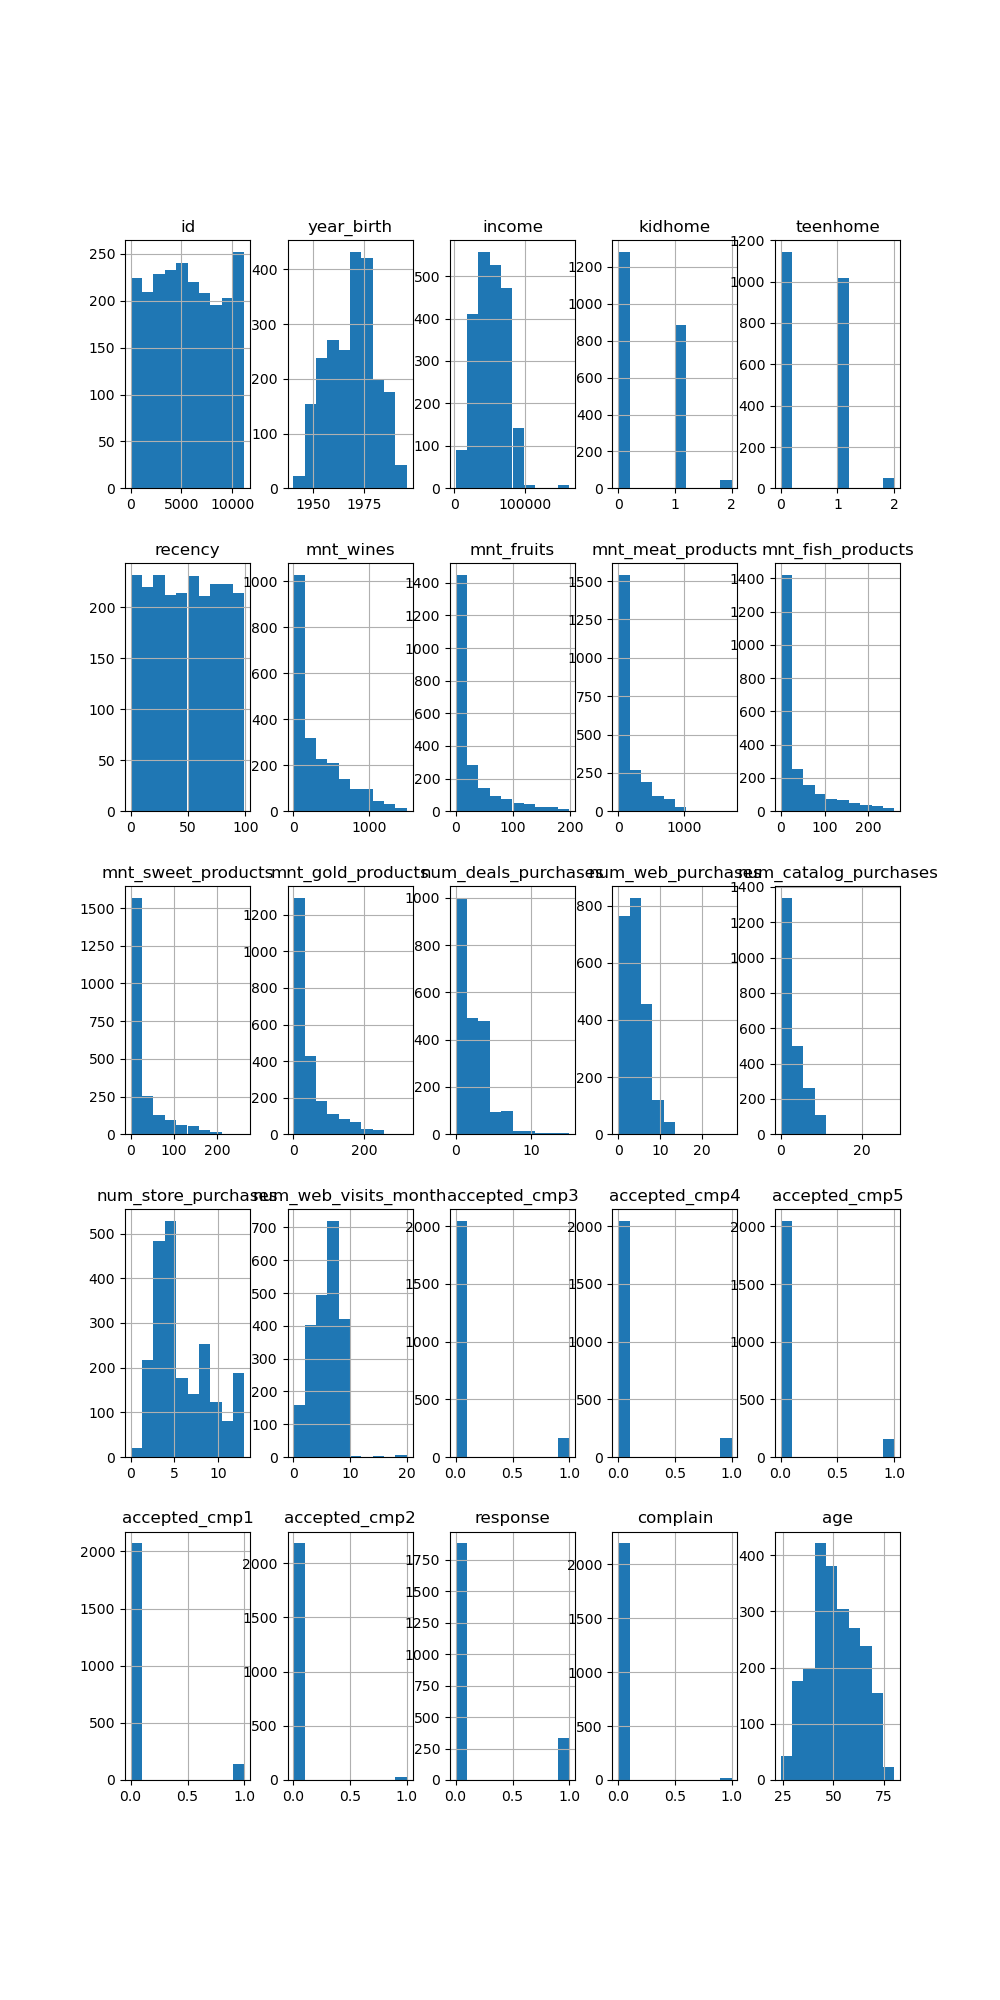

/var/folders/cv/yhlw7rnd337f6zdv14_0499w0000gn/T/ipykernel_97884/3819018470.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  marketing_data.hist(ax=ax)


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'year_birth'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'kidhome'}>,
        <Axes: title={'center': 'teenhome'}>],
       [<Axes: title={'center': 'recency'}>,
        <Axes: title={'center': 'mnt_wines'}>,
        <Axes: title={'center': 'mnt_fruits'}>,
        <Axes: title={'center': 'mnt_meat_products'}>,
        <Axes: title={'center': 'mnt_fish_products'}>],
       [<Axes: title={'center': 'mnt_sweet_products'}>,
        <Axes: title={'center': 'mnt_gold_products'}>,
        <Axes: title={'center': 'num_deals_purchases'}>,
        <Axes: title={'center': 'num_web_purchases'}>,
        <Axes: title={'center': 'num_catalog_purchases'}>],
       [<Axes: title={'center': 'num_store_purchases'}>,
        <Axes: title={'center': 'num_web_visits_month'}>,
        <Axes: title={'center': 'accepted_cmp3'}>,
        <Axes: title={'center': 'accepted_cmp4'}>,
        <Axes: title={'ce

In [15]:
fig = plt.figure(figsize=(10,20))
ax = fig.gca()
marketing_data.hist(ax=ax)

In [16]:
marketing_data.corr()

/var/folders/cv/yhlw7rnd337f6zdv14_0499w0000gn/T/ipykernel_97884/1369349577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  marketing_data.corr()


id  year_birth    income   kidhome  teenhome  \
id                     1.000000    0.005086  0.000905  0.000971 -0.003508   
year_birth             0.005086    1.000000 -0.199977  0.237497 -0.361932   
income                 0.000905   -0.199977  1.000000 -0.514523  0.034565   
kidhome                0.000971    0.237497 -0.514523  1.000000 -0.039066   
teenhome              -0.003508   -0.361932  0.034565 -0.039066  1.000000   
recency               -0.044147   -0.015694  0.007965  0.010623  0.014392   
mnt_wines             -0.018906   -0.164615  0.688209 -0.497203  0.003945   
mnt_fruits             0.010008   -0.013447  0.507354 -0.373258 -0.175905   
mnt_meat_products     -0.003706   -0.033622  0.692279 -0.439031 -0.261134   
mnt_fish_products     -0.022405   -0.041154  0.520040 -0.388643 -0.205235   
mnt_sweet_products    -0.004381   -0.021516  0.523599 -0.377843 -0.163107   
mnt_gold_products     -0.008013   -0.059779  0.388299 -0.354922 -0.018579   
num_deals_purchases   -0.040849   -0.066156 -0.108207  0.216594  0.386805   
num_web_purchases     -0.017232   -0.162265  0.459265 -0.372327  0.162239   
num_catalog_purchases -0.000404   -0.125856  0.696589 -0.504598 -0.112477   
num_store_purchases   -0.011733   -0.138998  0.631424 -0.501863  0.049212   
num_web_visits_month  -0.008610    0.120282 -0.650257  0.447258  0.130985   
accepted_cmp3         -0.035668    0.061097 -0.015152  0.016135 -0.042797   
accepted_cmp4         -0.023692   -0.070035  0.219633 -0.162111  0.038168   
accepted_cmp5         -0.004441    0.019025  0.395569 -0.204582 -0.190119   
accepted_cmp1         -0.017989   -0.011941  0.327524 -0.174261 -0.145198   
accepted_cmp2         -0.014901   -0.007821  0.104036 -0.081911 -0.015633   
response              -0.021112    0.020937  0.161387 -0.077901 -0.154402   
complain               0.031839   -0.004602 -0.027900  0.037067  0.007746   
age                   -0.005086   -1.000000  0.199977 -0.237497  0.361932   

                        recency  mnt_wines  mnt_fruits  mnt_meat_products  \
id                    -0.044147  -0.018906    0.010008          -0.003706   
year_birth            -0.015694  -0.164615   -0.013447          -0.033622   
income                 0.007965   0.688209    0.507354           0.692279   
kidhome                0.010623  -0.497203   -0.373258          -0.439031   
teenhome               0.014392   0.003945   -0.175905          -0.261134   
recency                1.000000   0.015981   -0.005257           0.022914   
mnt_wines              0.015981   1.000000    0.385844           0.568081   
mnt_fruits            -0.005257   0.385844    1.000000           0.546740   
mnt_meat_products      0.022914   0.568081    0.546740           1.000000   
mnt_fish_products      0.000788   0.396915    0.593038           0.572986   
mnt_sweet_products     0.025244   0.389583    0.571474           0.534624   
mnt_gold_products      0.018148   0.391461    0.393459           0.357556   
num_deals_purchases    0.002591   0.009117   -0.134191          -0.121128   
num_web_purchases     -0.005680   0.553663    0.302301           0.306841   
num_catalog_purchases  0.024197   0.634237    0.485611           0.733787   
num_store_purchases   -0.000460   0.640219    0.459875           0.486349   
num_web_visits_month  -0.018965  -0.321616   -0.417741          -0.539194   
accepted_cmp3         -0.032361   0.061360    0.014644           0.018416   
accepted_cmp4          0.017520   0.373349    0.006598           0.091677   
accepted_cmp5          0.000233   0.472889    0.208990           0.375252   
accepted_cmp1         -0.021147   0.351610    0.192417           0.313379   
accepted_cmp2         -0.001429   0.206309   -0.009924           0.043549   
response              -0.200114   0.246320    0.123007           0.237966   
complain               0.005713  -0.036420   -0.002956          -0.021017   
age                    0.015694   0.164615    0.013447           0.033622   

                       

<IPython.core.display.Javascript object>


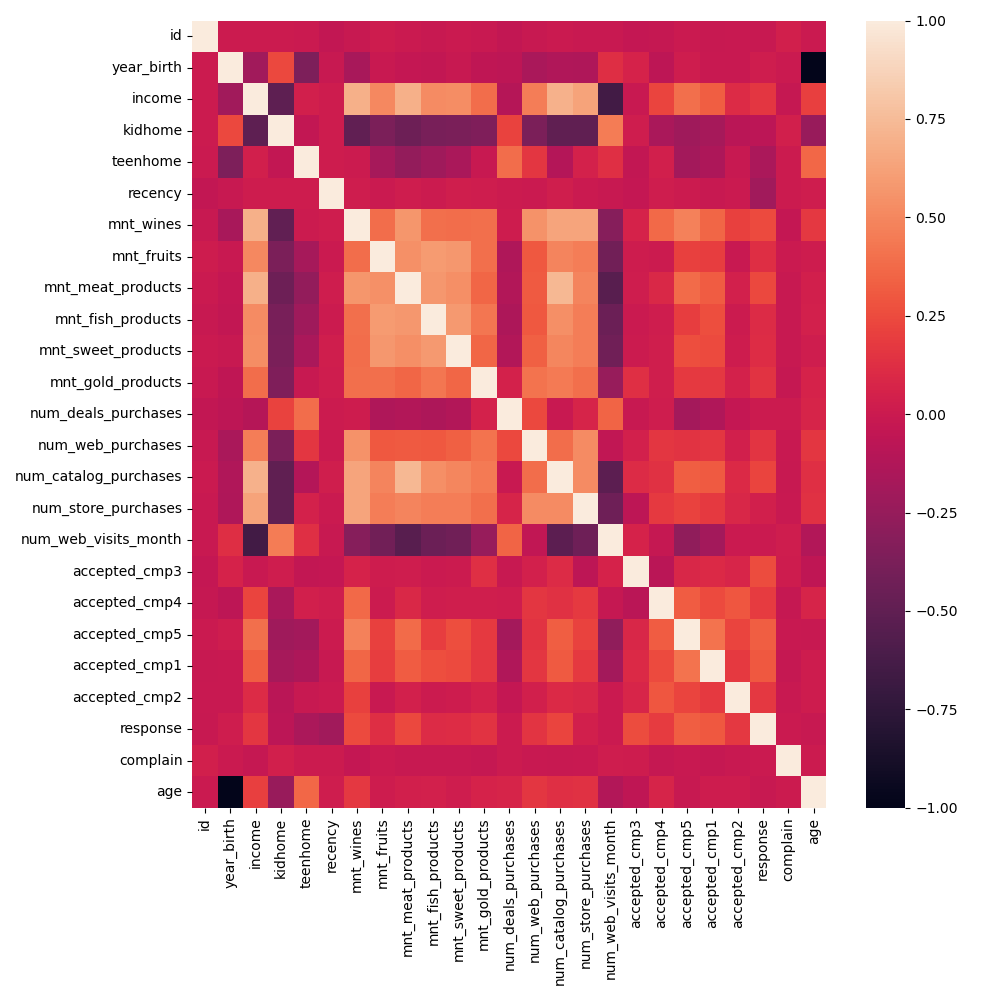

/var/folders/cv/yhlw7rnd337f6zdv14_0499w0000gn/T/ipykernel_97884/2876532971.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= marketing_data.corr(),annot = False)


In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data= marketing_data.corr(),annot = False)
plt.tight_layout()
plt.show()

PURCHASING BY INCOME:
- Now it's time to start looking into the big question. A `for` loop is used to see the relationship bewteen `income` and each `num_{type}_purchases` variable. The `hue` parameter with the `education` variable is used to see if there are any patterns that can be deciphered between `education` and `num_{type}_purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

<IPython.core.display.Javascript object>


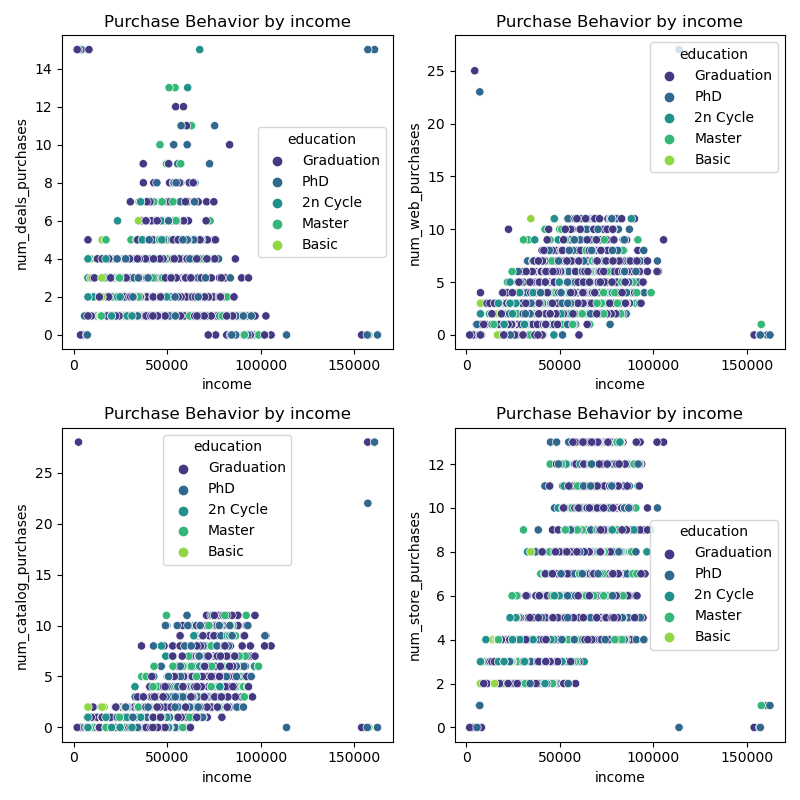

In [19]:
num_purchase_cols = ["num_deals_purchases","num_web_purchases","num_catalog_purchases","num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8,8))

for i in range(len(num_purchase_cols)):
    plot+=1
    ax =plt.subplot(2,2,plot)
    sns.scatterplot(x=marketing_data["income"],y=marketing_data[num_purchase_cols[i]],
                   hue=marketing_data["education"], palette="viridis")
    plt.title("Purchase Behavior by income")
    plt.tight_layout()
    plt.show()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable.

<IPython.core.display.Javascript object>


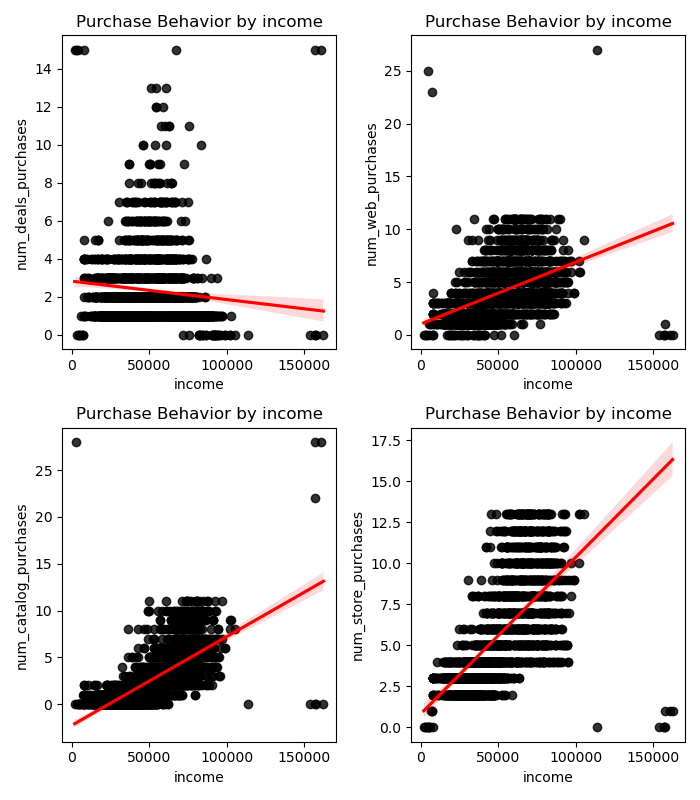

In [21]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
fig = plt.figure(figsize=(7,8))
plot = 0

for i in range(len(num_purchases_cols)):
    plot +=1
    ax = plt.subplot(2,2,plot)
    sns.regplot(x=marketing_data["income"], y = marketing_data[num_purchases_cols[i]],
               scatter_kws={"color": "black"}, line_kws={"color":"red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

To get a better look at the linear relationships, `.regplot()` was used. `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.


In [22]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]


<IPython.core.display.Javascript object>


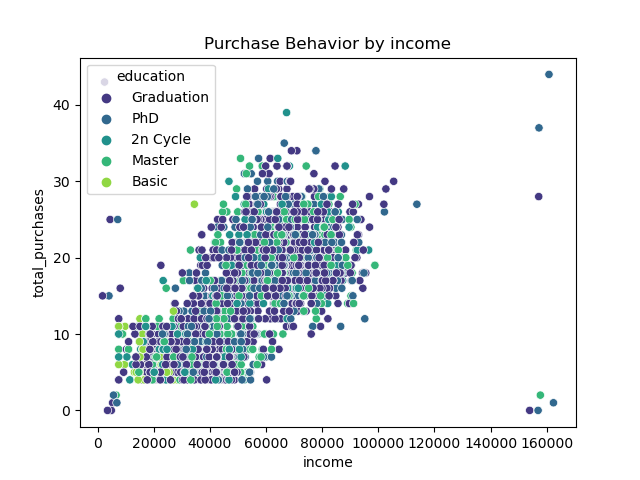

In [24]:
plt.figure()
sns.scatterplot(y=marketing_data["total_purchases"], x =marketing_data["income"],
               hue=marketing_data["education"], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()

<IPython.core.display.Javascript object>


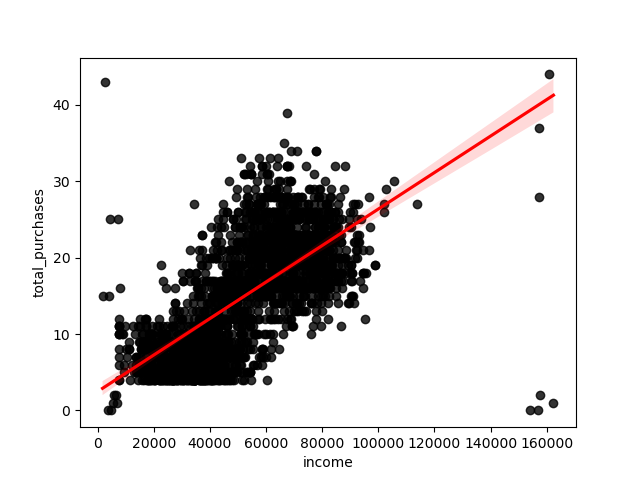

In [25]:
plt.figure()
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["income"],
           scatter_kws={"color":"black"}, line_kws={"color":"red"})
plt.show()

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the `education` and `total_purchases` as the points are scattered randomly across the plot.


MORE PURCHASING BEHAVIOR BY INCOME (income vs type of products)


<IPython.core.display.Javascript object>


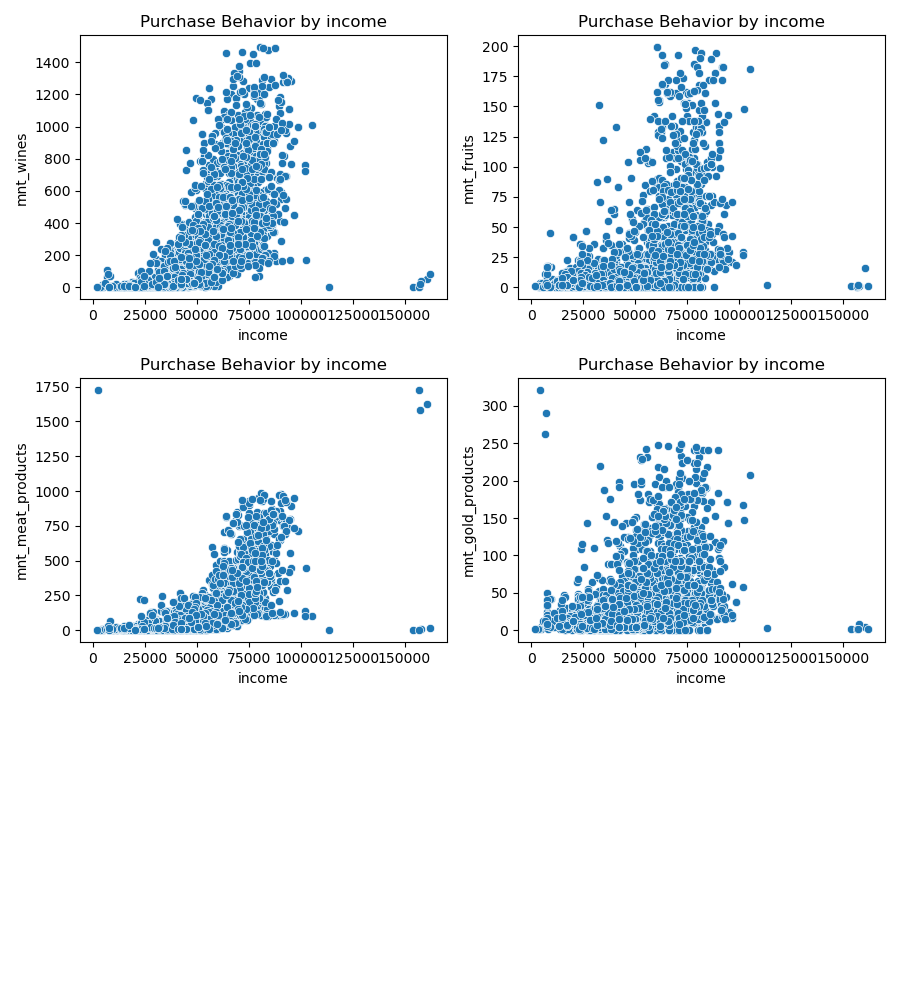

In [27]:
amounts_list =["mnt_wines","mnt_fruits", "mnt_meat_products","mnt_gold_products"]
axes = [None for column in amounts_list]
plot = 0
fig = plt.figure(figsize =(9,10))
for i in range(len(amounts_list)):
    plot +=1
    ax = plt.subplot(3,2, plot)
    sns.scatterplot(y=marketing_data[amounts_list[i]], x=marketing_data["income"])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()
    

These plots all show a positive relationship between `income` and each `mnt_{type}_products` variable. However, there is not enough visual evidence to see that it is linear. For further analysis, The *log* scale of the the `income` variable and the `mnt_{type}_products` variables are plotted.


<IPython.core.display.Javascript object>


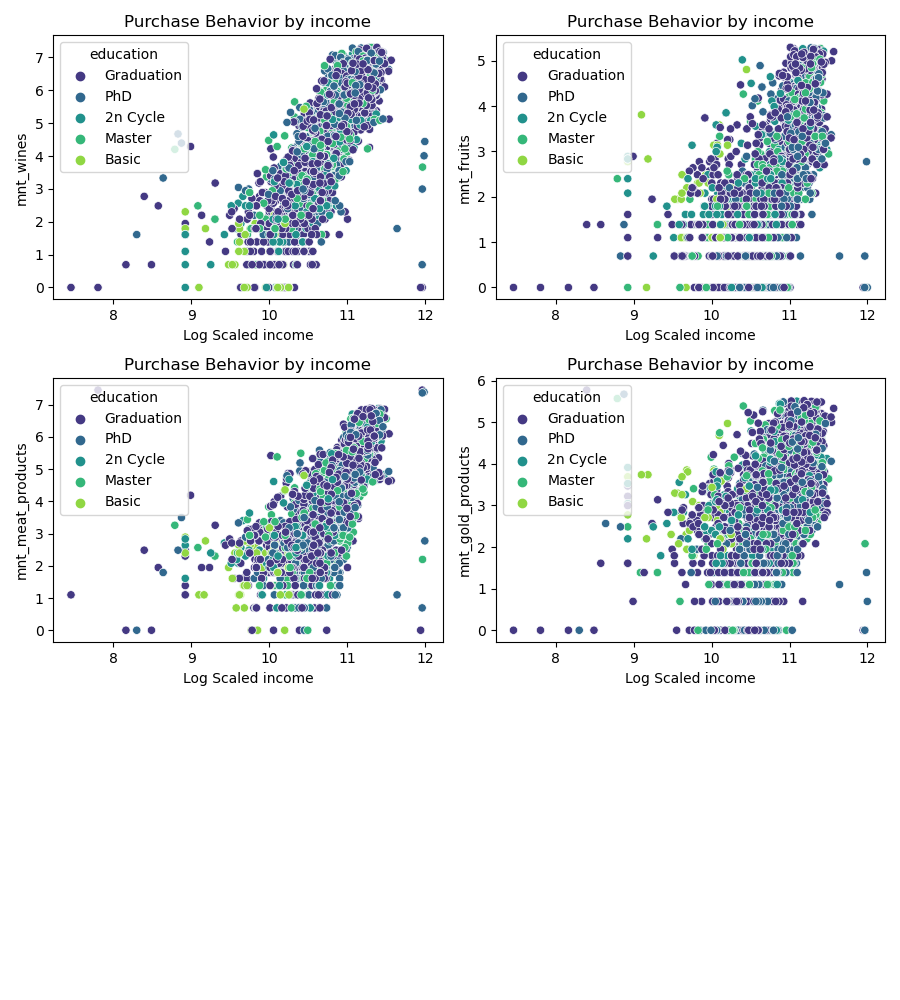

/Users/phuongdungcaonguyen/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/phuongdungcaonguyen/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/phuongdungcaonguyen/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/phuongdungcaonguyen/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
amounts_list =["mnt_wines","mnt_fruits", "mnt_meat_products","mnt_gold_products"]
axes = [None for column in amounts_list]
plot = 0
fig = plt.figure(figsize =(9,10))
for i in range(len(amounts_list)):
    plot +=1
    ax = plt.subplot(3,2, plot)
    sns.scatterplot(y=np.log(marketing_data[amounts_list[i]]), x=np.log(marketing_data["income"]),
                    hue=marketing_data["education"], palette="viridis")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

With the *log* scaled variables, it is easy to see there is an fairly strong linear, positive relationship between the variables across the board. It is still hard to see how education plays a role, however.


PURCHASING BEHAVIOR BY EDUCATION AND INCOME
A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.


<IPython.core.display.Javascript object>


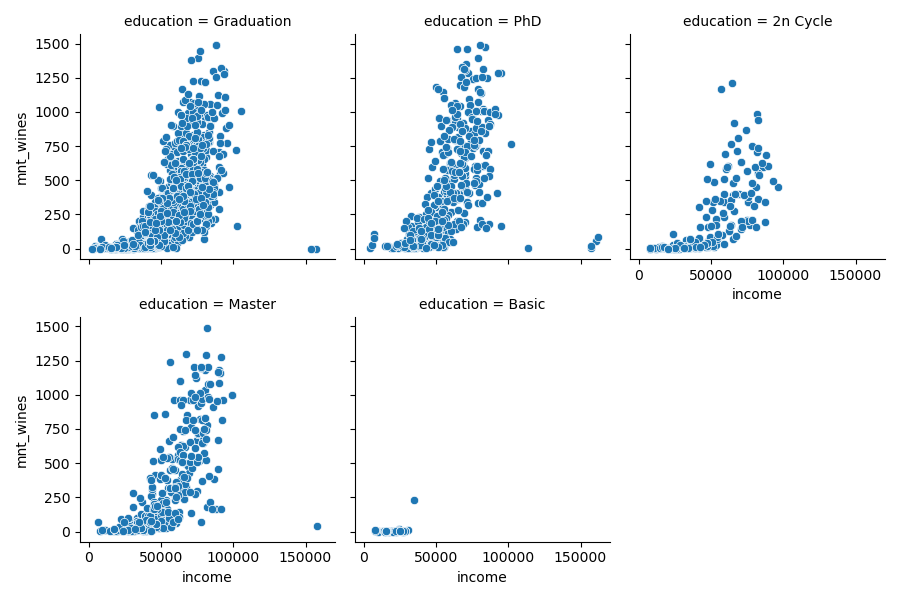

<IPython.core.display.Javascript object>


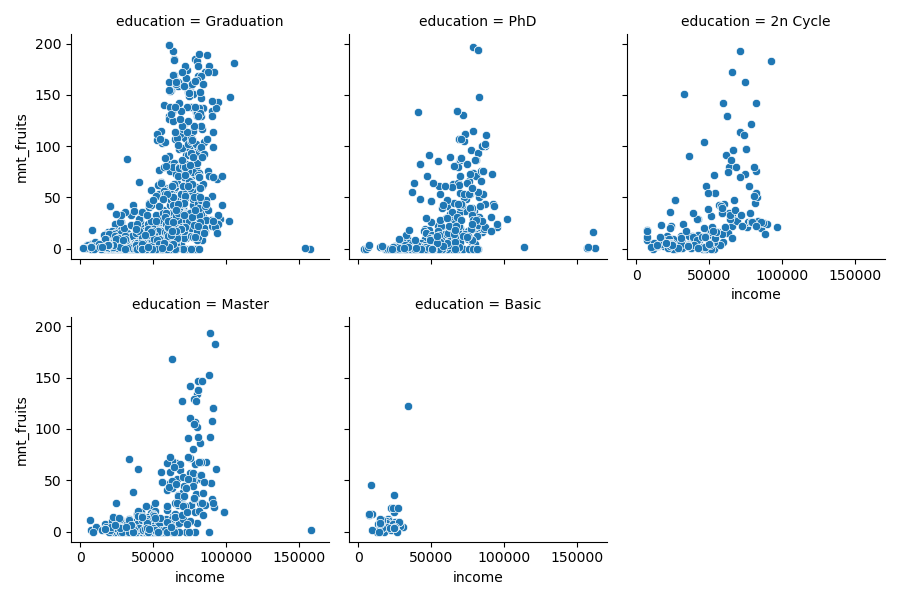

<IPython.core.display.Javascript object>


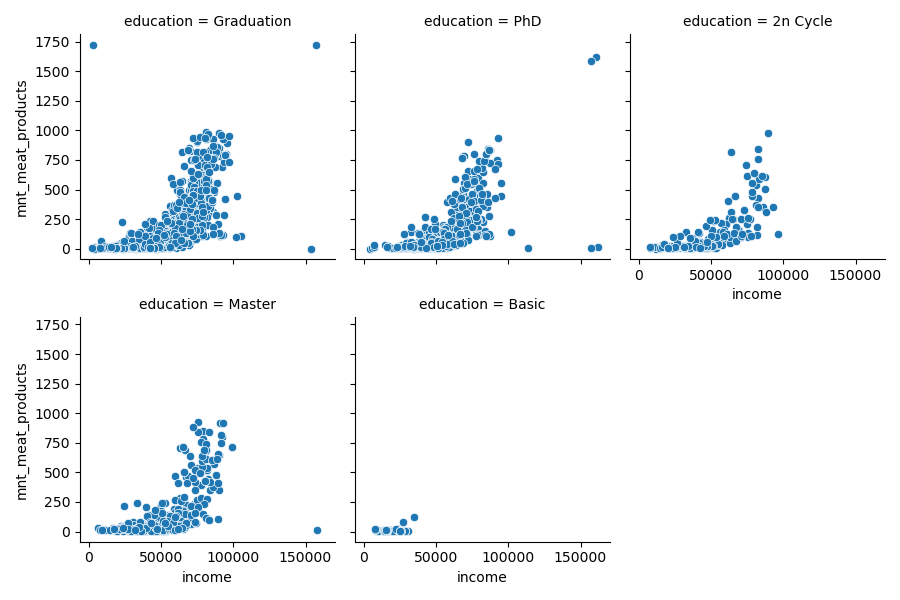

<IPython.core.display.Javascript object>


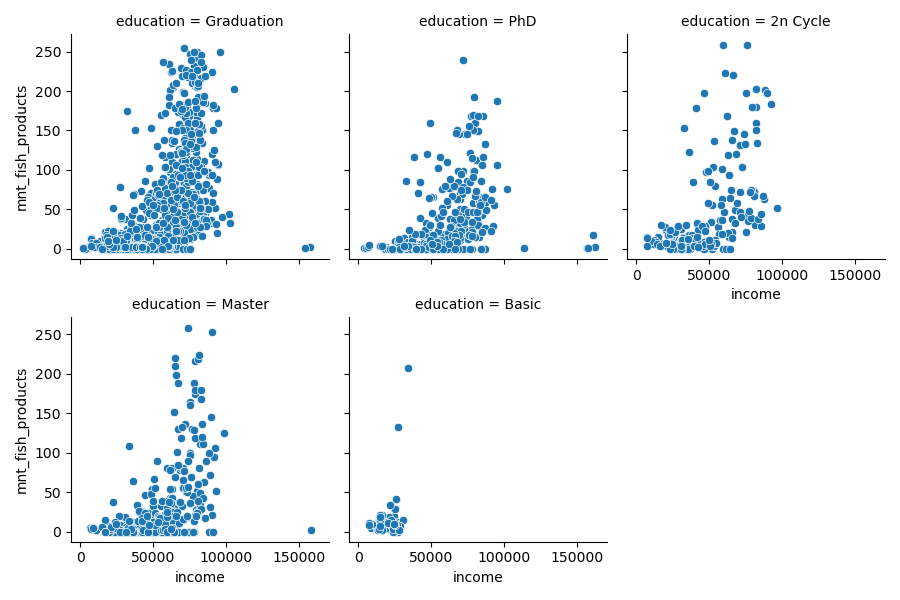

<IPython.core.display.Javascript object>


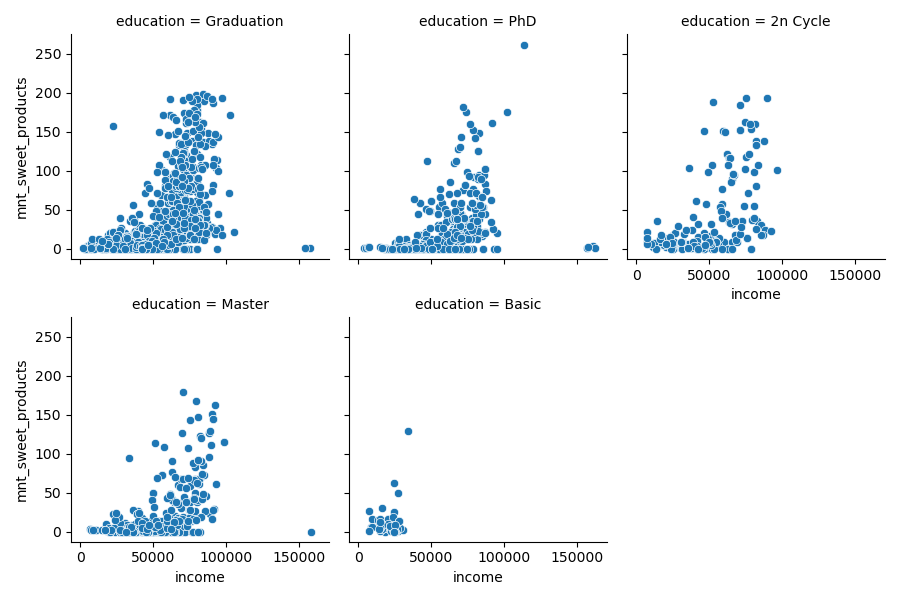

<IPython.core.display.Javascript object>


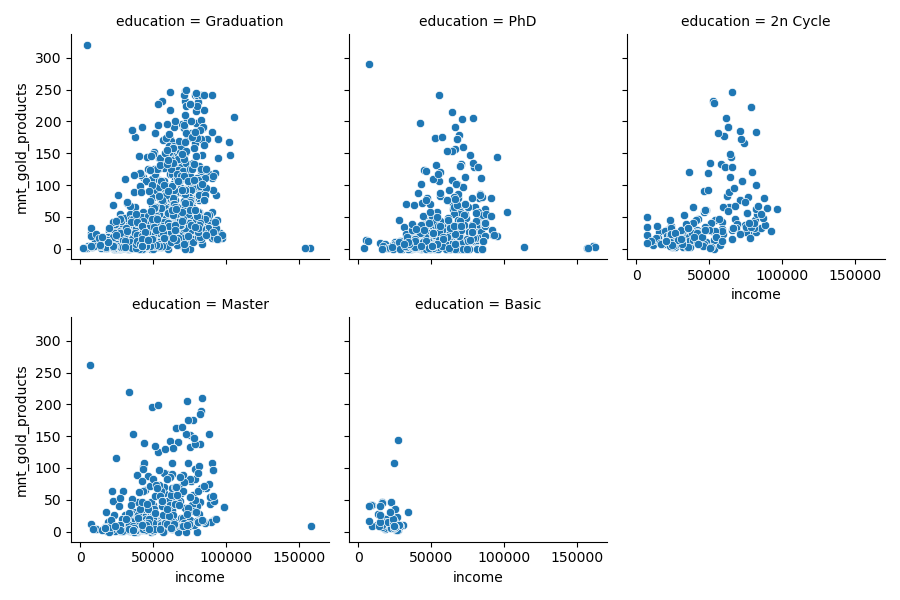

In [37]:
# dictionary used to contain dynamic variables
variable_names = {}
#amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", amounts_list[i])
plt.show()
    

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
- This store does not have many shoppers with a `Basic` education level.
- Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
- `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

PURCHASING BEHAVIOR BY AGE
The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

<IPython.core.display.Javascript object>


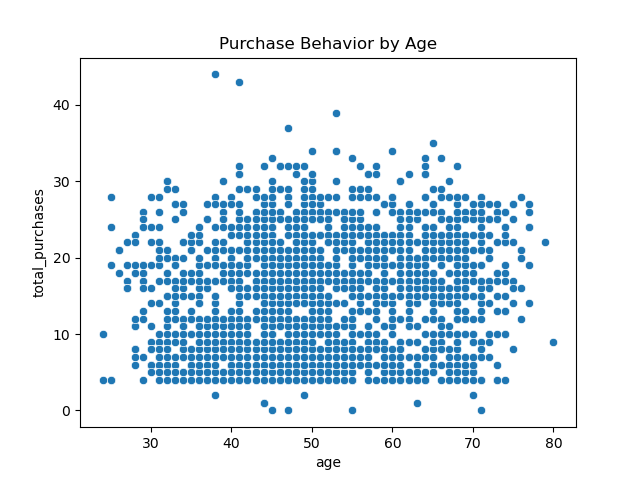

In [38]:
plt.figure()
sns.scatterplot(x=marketing_data["age"],y=marketing_data["total_purchases"])
plt.title("Purchase Behavior by Age")
plt.show()

It is hard to see any relationship between `age` and `total_purchases` in this plot.

/var/folders/cv/yhlw7rnd337f6zdv14_0499w0000gn/T/ipykernel_97884/3827610868.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(9,10))


<IPython.core.display.Javascript object>


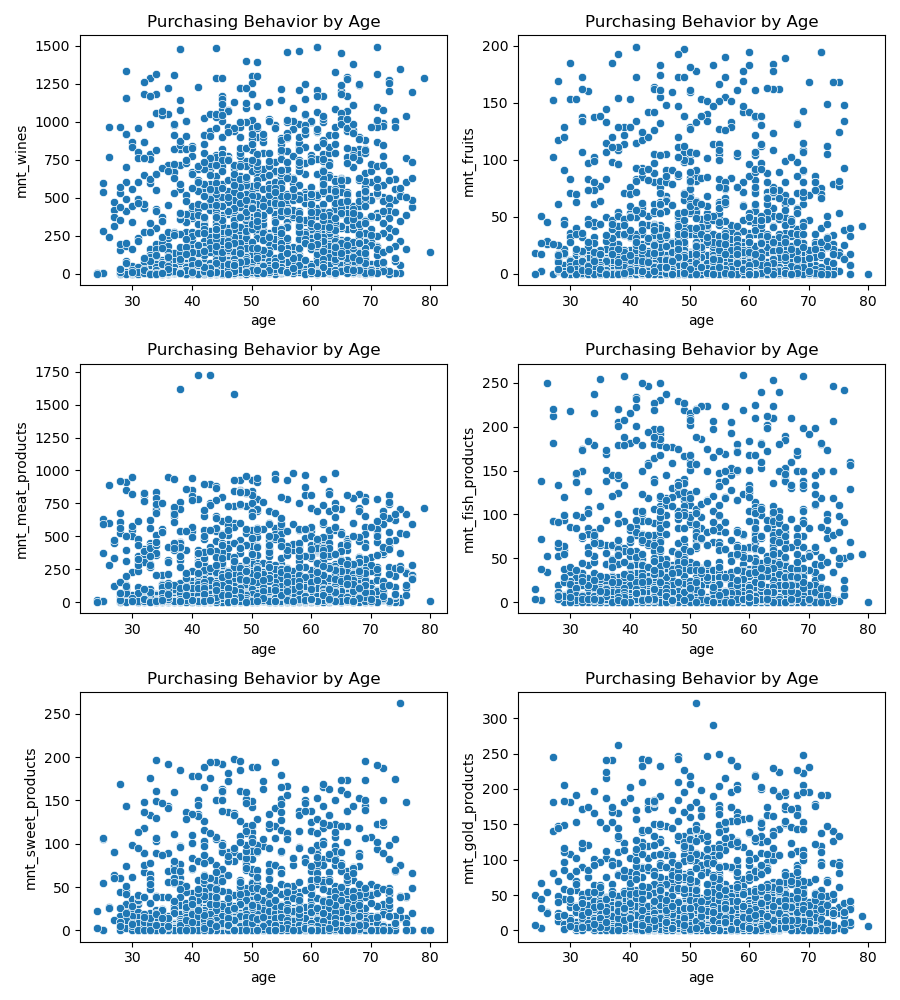

In [41]:

amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_list)):
    plot+=1
    ax=plt.subplot(3,2,plot)
    sns.scatterplot(y=marketing_data[amounts_list[i]], x= marketing_data["age"])
    plt.title("Purchasing Behavior by Age")
plt.tight_layout()
plt.show()

Again, it is difficult to decipher any pattern between `age` and any `mnt_{type}_products` in any of these plots. A different strategy may be useful to analyze `age`.

<IPython.core.display.Javascript object>


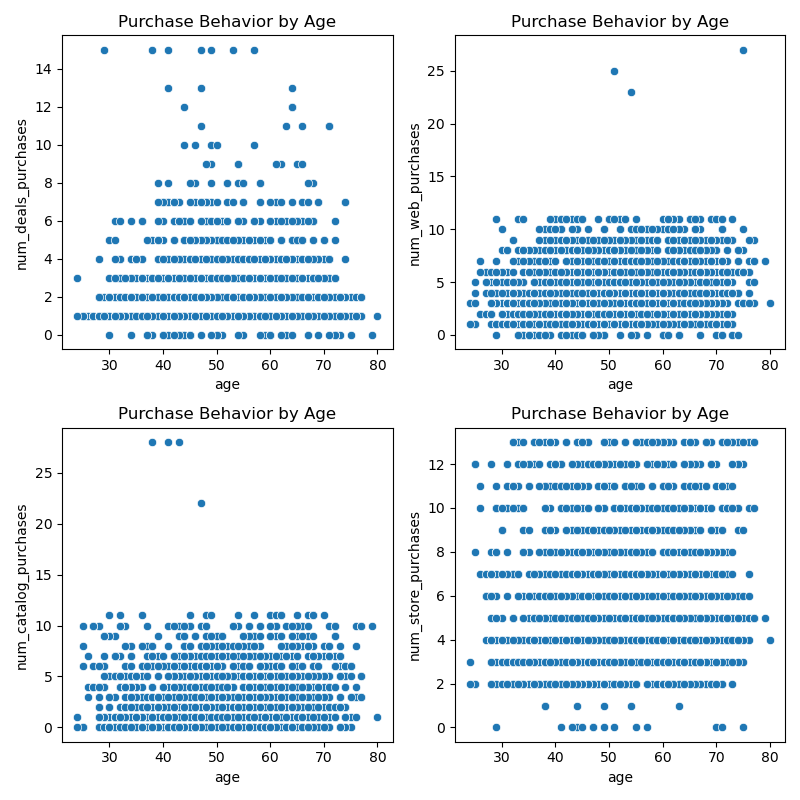

In [42]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot =0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchases_cols)):
    plot+=1
    ax = plt.subplot(2,2,plot)
    sns.scatterplot(x=marketing_data["age"], y = marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by Age")
plt.tight_layout()
plt.show()

It is also difficult to decipher any pattern between `age` and any `num_{type}_purchases` in any of these plots. Because of this, a different analysis strategy will be used on the `age` variable.


To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

In [43]:
def age_groups(age):
    if 18 <= age <= 35 : 
        return "18 to 35" 
    elif 35 < age <= 50 : 
        return "36 to 50"
    elif 50 < age <= 70 : 
        return "51 to 70"
    else : 
        return "71 and Older"
    
marketing_data["age_group"] = marketing_data["age"].apply(age_groups)

In [48]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

In [49]:
print(age_plus_amounts)

      age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   6957      56038        6642              44974   
1      36 to 50  41074     237527       22553             137596   
2      51 to 70  57225     329022       25336             159619   
3  71 and Older   7747      52709        3710              27281   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               8801                6648               9271  
1              32303               23731              37050  
2              36399               25433              45998  
3               5776                4015               4845  


<IPython.core.display.Javascript object>


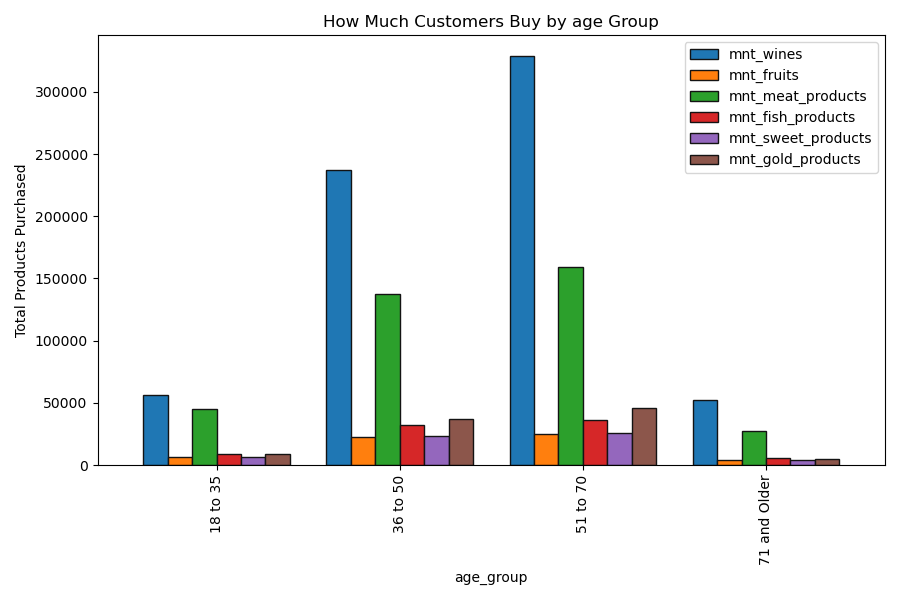

In [50]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if `age_group` affects how many items customers buy each time. 

<IPython.core.display.Javascript object>


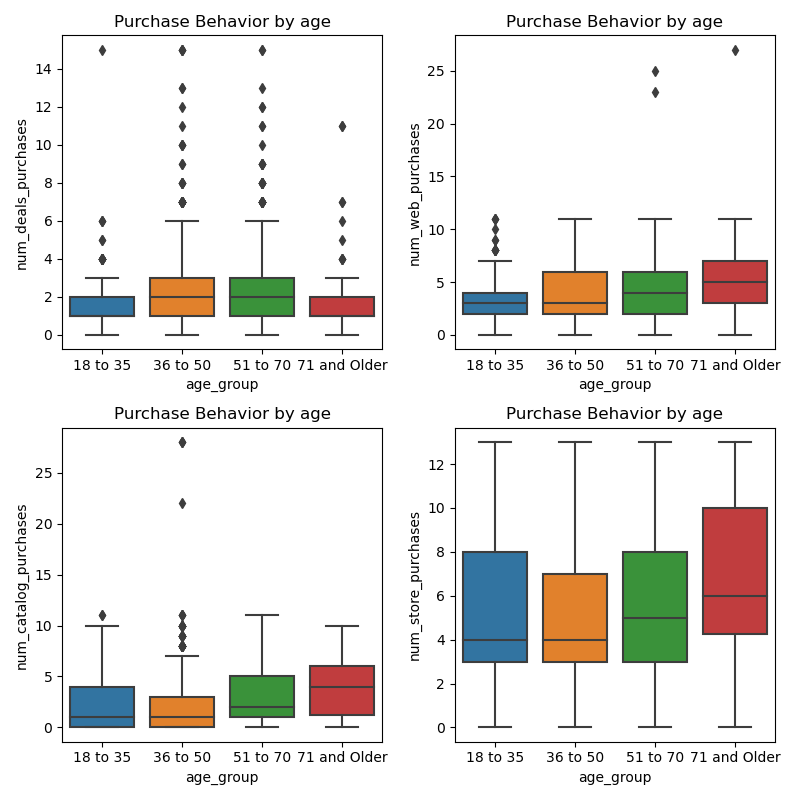

In [52]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))

for i in range(len(num_purchases_cols)):
    plot += 1
   
    ax = plt.subplot(2, 2, plot)
   
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

CONCLUSION:
    It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 
